0. Pathway Schematic:

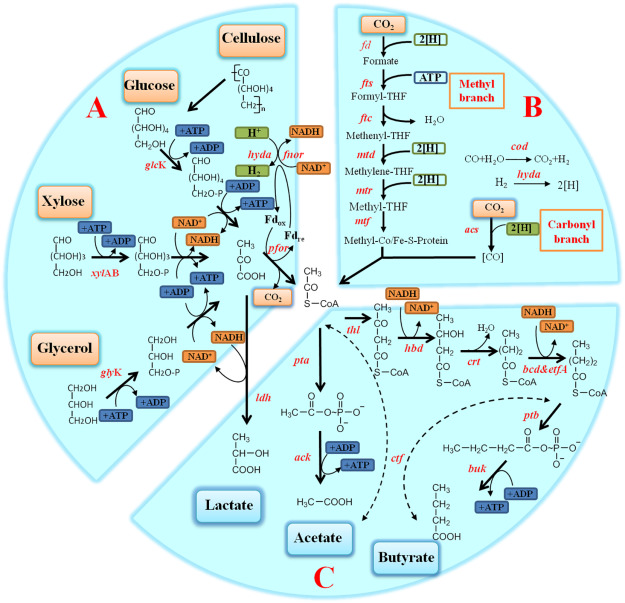

1. Verification that enzymes exist in KEGG:

Metabolites:


Enzymes:
- thl - thiolase: 2.3.1.9;
    - rxn: R00238;
- hbd - beta-hydroxybutyryl-CoA dehydrogenase: 1.1.1.35;
    - rxn: R01975;
- crt - crotonase: 4.2.1.17;
    - rxn: R03026;
- bcd - butyryl-CoA dehydrogenase: 1.3.1.109
    - rxn: R11675;
    - Note:
        - Need ferridoxin;
    - etfA (electron-transfering flavoprotein) is necessary for this reaction;
- ctf - CoA transferase: 2.8.3.8;
    - rxn: R01179;

Ethanol => acetyl-CoA generates NADH, also fuels reaction

In [1]:
thl_rxn_id = 'R00238'
hbd_rxn_id = 'R01976'
crt_rxn_id = 'R03026'
bcd_rxn_id = 'R11675'
ctf_rxn_id = 'R01179'
rxn_ids = [thl_rxn_id,hbd_rxn_id,crt_rxn_id,bcd_rxn_id,ctf_rxn_id]

thl_enzyme_id = '2.3.1.9'
hbd_enzyme_id = '1.1.1.35'
crt_enzyme_id = '4.2.1.17'
bcd_enzyme_id = '1.3.1.109'
ctf_enzyme_id = '2.8.3.8'
enzyme_ids = [thl_enzyme_id,hbd_enzyme_id,crt_enzyme_id,bcd_enzyme_id,ctf_enzyme_id]

1. Set Up Analysis

In [2]:
from cobra import Model, Reaction, Metabolite
from equilibrator_api import ComponentContribution

import sys
sys.path.append('src/Classes')
sys.path.append('src/Classes/Components')
sys.path.append('../../Lib/site-packages')

from KPA_parse_KEGG_query import KPA_parse_KEGG, KPA_Reaction, KPA_Metabolite, KPA_Enzyme


2. Set up batch run parameters

In [3]:
"""Set batch run parameters"""


mdl = Model(name='butyric_acid_KPA')

"""Query reaction and enzyme data from KEGG"""
cc = ComponentContribution()
[[],rxns,[]] = KPA_parse_KEGG(rxn_ids,cc)
print(rxns)
for rxn in rxns:
    rxn.metabolites = KPA_parse_KEGG(rxn.get_metabolite_entries(),cc)
    mdl.add_reactions([rxn.cobra_rxn])

# for idx,enz in enumerate(enzyme_ids):
#     rxns[idx].enzyme_id = enz


https://rest.kegg.jp/get/R00238+R01976+R03026+R11675+R01179
['2', 'C00024']
['2', 'Acetyl-CoA']
test {Compound(id=23, inchi_key=ZSLZBFCDCINBPY-ZSJPKINUSA-J): -2, Compound(id=15, inchi_key=RGJOEKWQDUBAIZ-IBOSZNHHSA-J): 1, Compound(id=125, inchi_key=OJFDKHTZOUZBOS-CITAKDKDSA-J): 1}
['C01144']
['(S)-3-Hydroxybutanoyl-CoA']
['C00006']
['NADP+']
test {Compound(id=425, inchi_key=QHHKKMYHDBRONY-VKBDFPRVSA-J): -1, Compound(id=8, inchi_key=XJLXINKUBYWONI-NNYOXOHSSA-K): -1, Compound(id=125, inchi_key=OJFDKHTZOUZBOS-CITAKDKDSA-J): 1, Compound(id=9, inchi_key=ACFIXJIJDZMPPO-NNYOXOHSSA-J): 1, Compound(id=4, inchi_key=GPRLSGONYQIRFK-UHFFFAOYSA-N): 1}
['C01144']
['(S)-3-Hydroxybutanoyl-CoA']
test {Compound(id=425, inchi_key=QHHKKMYHDBRONY-VKBDFPRVSA-J): -1, Compound(id=202, inchi_key=KFWWCMJSYSSPSK-PAXLJYGASA-J): 1, Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFAOYSA-N): 1}
['C00136']
['Butanoyl-CoA']
['2', 'C00003']
['2', 'NAD+']
['2', 'C00138']
['2', 'Reduced', 'ferredoxin']
test {Compound(id=220, i

In [4]:
from cobra.util.solver import linear_reaction_coefficients
mdl.objective = ctf_rxn_id
mdl.objective.direction = 'max'
print(linear_reaction_coefficients(mdl))

print("Reactions")
print("---------")
for x in mdl.reactions:
    print("%s : %s" % (x.lower_bound, x.upper_bound))

print("")
print("Metabolites")
print("-----------")
for x in mdl.metabolites:
    print('%9s : %s' % (x.id, x.compartment))

# mdl.add_metabolites([Metabolite('C00033_e',compartment='e')])
# mdl.add_boundary(mdl.metabolites.get_by_id('C00033_e'),type='exchange')
mdl.add_boundary(mdl.metabolites.get_by_id('C00033'),type='sink')
mdl.add_boundary(mdl.metabolites.get_by_id('C00246'),type='sink')

print(mdl.boundary)
mdl.optimize()
print(mdl.metabolites.get_by_id('C00246').summary())

from pprint import pprint
from cobra.io import write_sbml_model, validate_sbml_model
write_sbml_model(mdl,filename='test_mdl.xml')
report = validate_sbml_model(filename='test_mdl.xml')

pprint(report)

ERROR:cobra.io.sbml:COBRA errors in validation, check error log for details.


{<Reaction R01179 at 0x1c14621be90>: 1.0}
Reactions
---------
-1000 : 1000
-1000 : 1000
-1000 : 1000
-1000 : 1000
-1000 : 1000

Metabolites
-----------
   C00024 : c
   C00010 : c
   C00332 : c
   C01144 : c
   C00006 : c
   C00005 : c
   C00080 : c
   C00877 : c
   C00001 : c
   C00136 : c
   C00003 : c
   C00138 : c
   C00004 : c
   C00139 : c
   C00033 : c
   C00246 : c
[<Reaction SK_C00033 at 0x1c17d2c2810>, <Reaction SK_C00246 at 0x1c1494aea20>]
C00246
Formula: None

Producing Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []

Consuming Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []
(<Model  at 0x1c14621a4b0>,
 {'COBRA_CHECK': [],
  'COBRA_ERROR': ["'' is not a valid SBML 'SId'."],
  'COBRA_FATAL': [],
  'COBRA_WARNING': [],
  'SBML_ERROR': [],
  'SBML_FATAL': [],
  'SBML_SCHEMA_ERROR': [],
  'SBML_WARNING': []})


3. Check mass balance with COBRA

In [5]:
"""Use COBRA to check mass balance of a batch run"""
mdl.optimize()

,fluxes,reduced_costs
R00238,0.0,0.0
R01976,0.0,0.0
R03026,0.0,0.0
R11675,0.0,-0.0
R01179,0.0,0.0
SK_C00033,0.0,0.0
SK_C00246,0.0,0.0


4. Use eQuilibrator to predict equilibrium concentrations of all metabolites

5. Visualize network

6. Check enzymes for potential promiscuity